In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import re
import unidecode
from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('TRABAJOPOLIS_FEB2019.csv',encoding='latin-1', sep=",")

In [4]:
df

,Nombre_Empresa,Id_Empleo,Ciudad,Categoria,Sueldo,Publicado,Vencimiento,Descripcion,Nombre_cargo,Enlace
0,Empresa de Servicios a Nivel Nacional,717052,"Sucre, Bolivia","Administración y Oficina,Dirección y Gerencia",No Declarado,05 Febrero 2019,07 Marzo 2019,importante empresa comercial busca incorporar ...,Coordinador(a) de Sucursal - Sucre,https://www.trabajopolis.bo/oferta-de-trabajo-...
1,Digital Tv Cable,717036,"Santa Cruz de la Sierra, Bolivia","Administración y Oficina,Atención al Cliente",Dependiendo de la Experiencia,05 Febrero 2019,07 Marzo 2019,digital tv cable internet esta buscando talen...,COORDINADOR (A) DE CALL CENTER Y ATC,https://www.trabajopolis.bo/oferta-de-trabajo-...
2,Electro Hogar S.R.L.,717026,"Santa Cruz de la Sierra, Bolivia",Administración y Oficina,De Bs. 2.060 a Bs. 2.999,05 Febrero 2019,07 Marzo 2019,secretaria recepcionista formacion conocimien...,Secretaria Recepcionista,https://www.trabajopolis.bo/oferta-de-trabajo-...
3,Cooperativa de Ahorro y Crédito Abierta Jesús ...,717041,"Sucre, Bolivia",Administración y Oficina,No Declarado,05 Febrero 2019,07 Marzo 2019,ejecutivo de negociosede chuquisacaformacionfo...,Ejecutivo(a) de Negocio - Chuquisaca,https://www.trabajopolis.bo/oferta-de-trabajo-...
4,Canedo Strampfer Consultores SRL,716469,"Cochabamba, Bolivia",Arquitectura,Negociable,05 Febrero 2019,07 Marzo 2019,arquitectofunciones elaboracion de planos calc...,Arquitecto(a),https://www.trabajopolis.bo/oferta-de-trabajo-...
...,...,...,...,...,...,...,...,...,...,...
8512,Conecta,782003,"Santa Cruz de la Sierra, Bolivia","AtenciÃ³n al Cliente,InformÃ¡tica",No Declarado,05 Agosto 2019,04 Septiembre 2019,conecta empresa miembro del grupo nacional vid...,Operador(a) de Call Center (Soporte TÃ©cnico),https://www.trabajopolis.bo/oferta-de-trabajo-...
8513,ETIKA,781818,"Santa Cruz de la Sierra, Bolivia",Marketing y Ventas,Dependiendo de la Experiencia,05 Agosto 2019,04 Septiembre 2019,nuestro cliente importante franquicia internac...,Sub Jefe de Tienda - Santa Cruz,https://www.trabajopolis.bo/oferta-de-trabajo-...
8514,Casa Grande Hoteles,781552,"La Paz, Bolivia","Otros,Turismo y HotelerÃ­a",No Declarado,05 Agosto 2019,04 Septiembre 2019,te invitamos a postular para ocupar el cargo d...,Agente de Seguridad - La Paz,https://www.trabajopolis.bo/oferta-de-trabajo-...
8515,HOMEPAC S.R.L.,770893,"La Paz, Bolivia",Marketing y Ventas,No Declarado,05 Agosto 2019,04 Septiembre 2019,prestigiosa empresa comercial desea incorporar...,Encargado(a) de Ventas Corporativas,https://www.trabajopolis.bo/oferta-de-trabajo-...


In [5]:
df.Id_Empleo.unique().shape

(4923,)

In [6]:
df_new = df.drop_duplicates(subset ="Id_Empleo") 

In [7]:
df_new.set_index('Id_Empleo', verify_integrity = True, inplace = True)

In [8]:
df_new['Publicado'].value_counts()

11 Enero 2019      67
08 Enero 2019      60
09 Agosto 2019     60
04 Febrero 2019    60
18 Enero 2019      56
                   ..
24 Febrero 2019     1
28 Abril 2019       1
27 Enero 2019       1
17 Febrero 2019     1
03 Marzo 2019       1
Name: Publicado, Length: 164, dtype: int64

In [9]:
df_new['Sueldo'].value_counts()

No Declarado                      3797
Dependiendo de la Experiencia      224
De Bs. 3.000 a Bs. 3.999           222
De Bs. 2.060 a Bs. 2.999           203
Negociable                         147
De Bs. 2.122 a Bs. 2.999            99
De Bs. 4.000 a Bs. 4.999            80
De Bs. 5.000 a Bs. 5.999            47
De Bs. 10.000 a Bs. 14.999          26
De Bs. 6.000 a Bs. 6.999            25
De Bs. 7.000 a Bs. 7.999            17
De Bs. 8.000 a Bs. 8.999            16
De Bs. 9.000 a Bs. 9.999            14
De Bs. 15.000 a Bs. 19.999           4
Mayores a Bs. 20.000                 2
Name: Sueldo, dtype: int64

In [10]:
df_new['Nombre_Empresa'].value_counts().head(10)

Importante Empresa                          172
Banco Fassil - Trabaje con Nosotros         127
INSTITUCION DE INTERMEDIACION FINANCIERA    119
Banco Pyme Ecofuturo S.A.                   113
Empresa Comercial                            77
Importante Empresa Comercial                 68
Importante Empresa Industrial                66
Univida S.A.                                 57
Empresa Industrial                           57
INDUSTRIAS FERROTODO LTDA.                   52
Name: Nombre_Empresa, dtype: int64

In [11]:
df_new['Ciudad'].value_counts()

Santa Cruz de la Sierra, Bolivia    2863
La Paz, Bolivia                     1062
Cochabamba, Bolivia                  573
Tarija, Bolivia                       90
El Alto, Bolivia                      90
Oruro, Bolivia                        62
Sucre, Bolivia                        61
PotosÃ­, Bolivia                      56
Trinidad, Bolivia                     26
Otra Ciudad de Bolivia, Bolivia       19
Potosí, Bolivia                       17
Cobija, Bolivia                        4
Name: Ciudad, dtype: int64

In [12]:
def column2text(feature):
    new_list = []
    # Separate by colon
    for element in feature:
        if ',' in element:
            tmp = element.split(',')
            new_list.append(tmp[0].rstrip())
            new_list.append(tmp[1].rstrip())
        #else:
         #   new_categorias.append(element)
    # Merge all elements of list into a text        
    txt = ''
    for element in new_list:
        txt = txt + element + ' '
    # Clean text
    text = txt.lower().replace('\n','') #Get items without \n
    text = re.sub("(\(\w+\))", '', text) #Delete parenthesis
    #text = unidecode.unidecode(text) #Delete accents
    #text = re.sub('[^A-Za-z0-9\s]','',text) #Delete anything but letters, numbers and spaces
    clean_text = text.replace('  ', ' ')
    return clean_text

In [13]:
df_new['Nombre_cargo'].value_counts().head()

Ejecutivo(a) de Ventas                 74
Auxiliar Contable                      56
Contador(a)                            33
Ejecutivo(a) de Ventas - Santa Cruz    31
Recepcionista                          31
Name: Nombre_cargo, dtype: int64

In [14]:
clean_text = column2text(df_new['Categoria'])

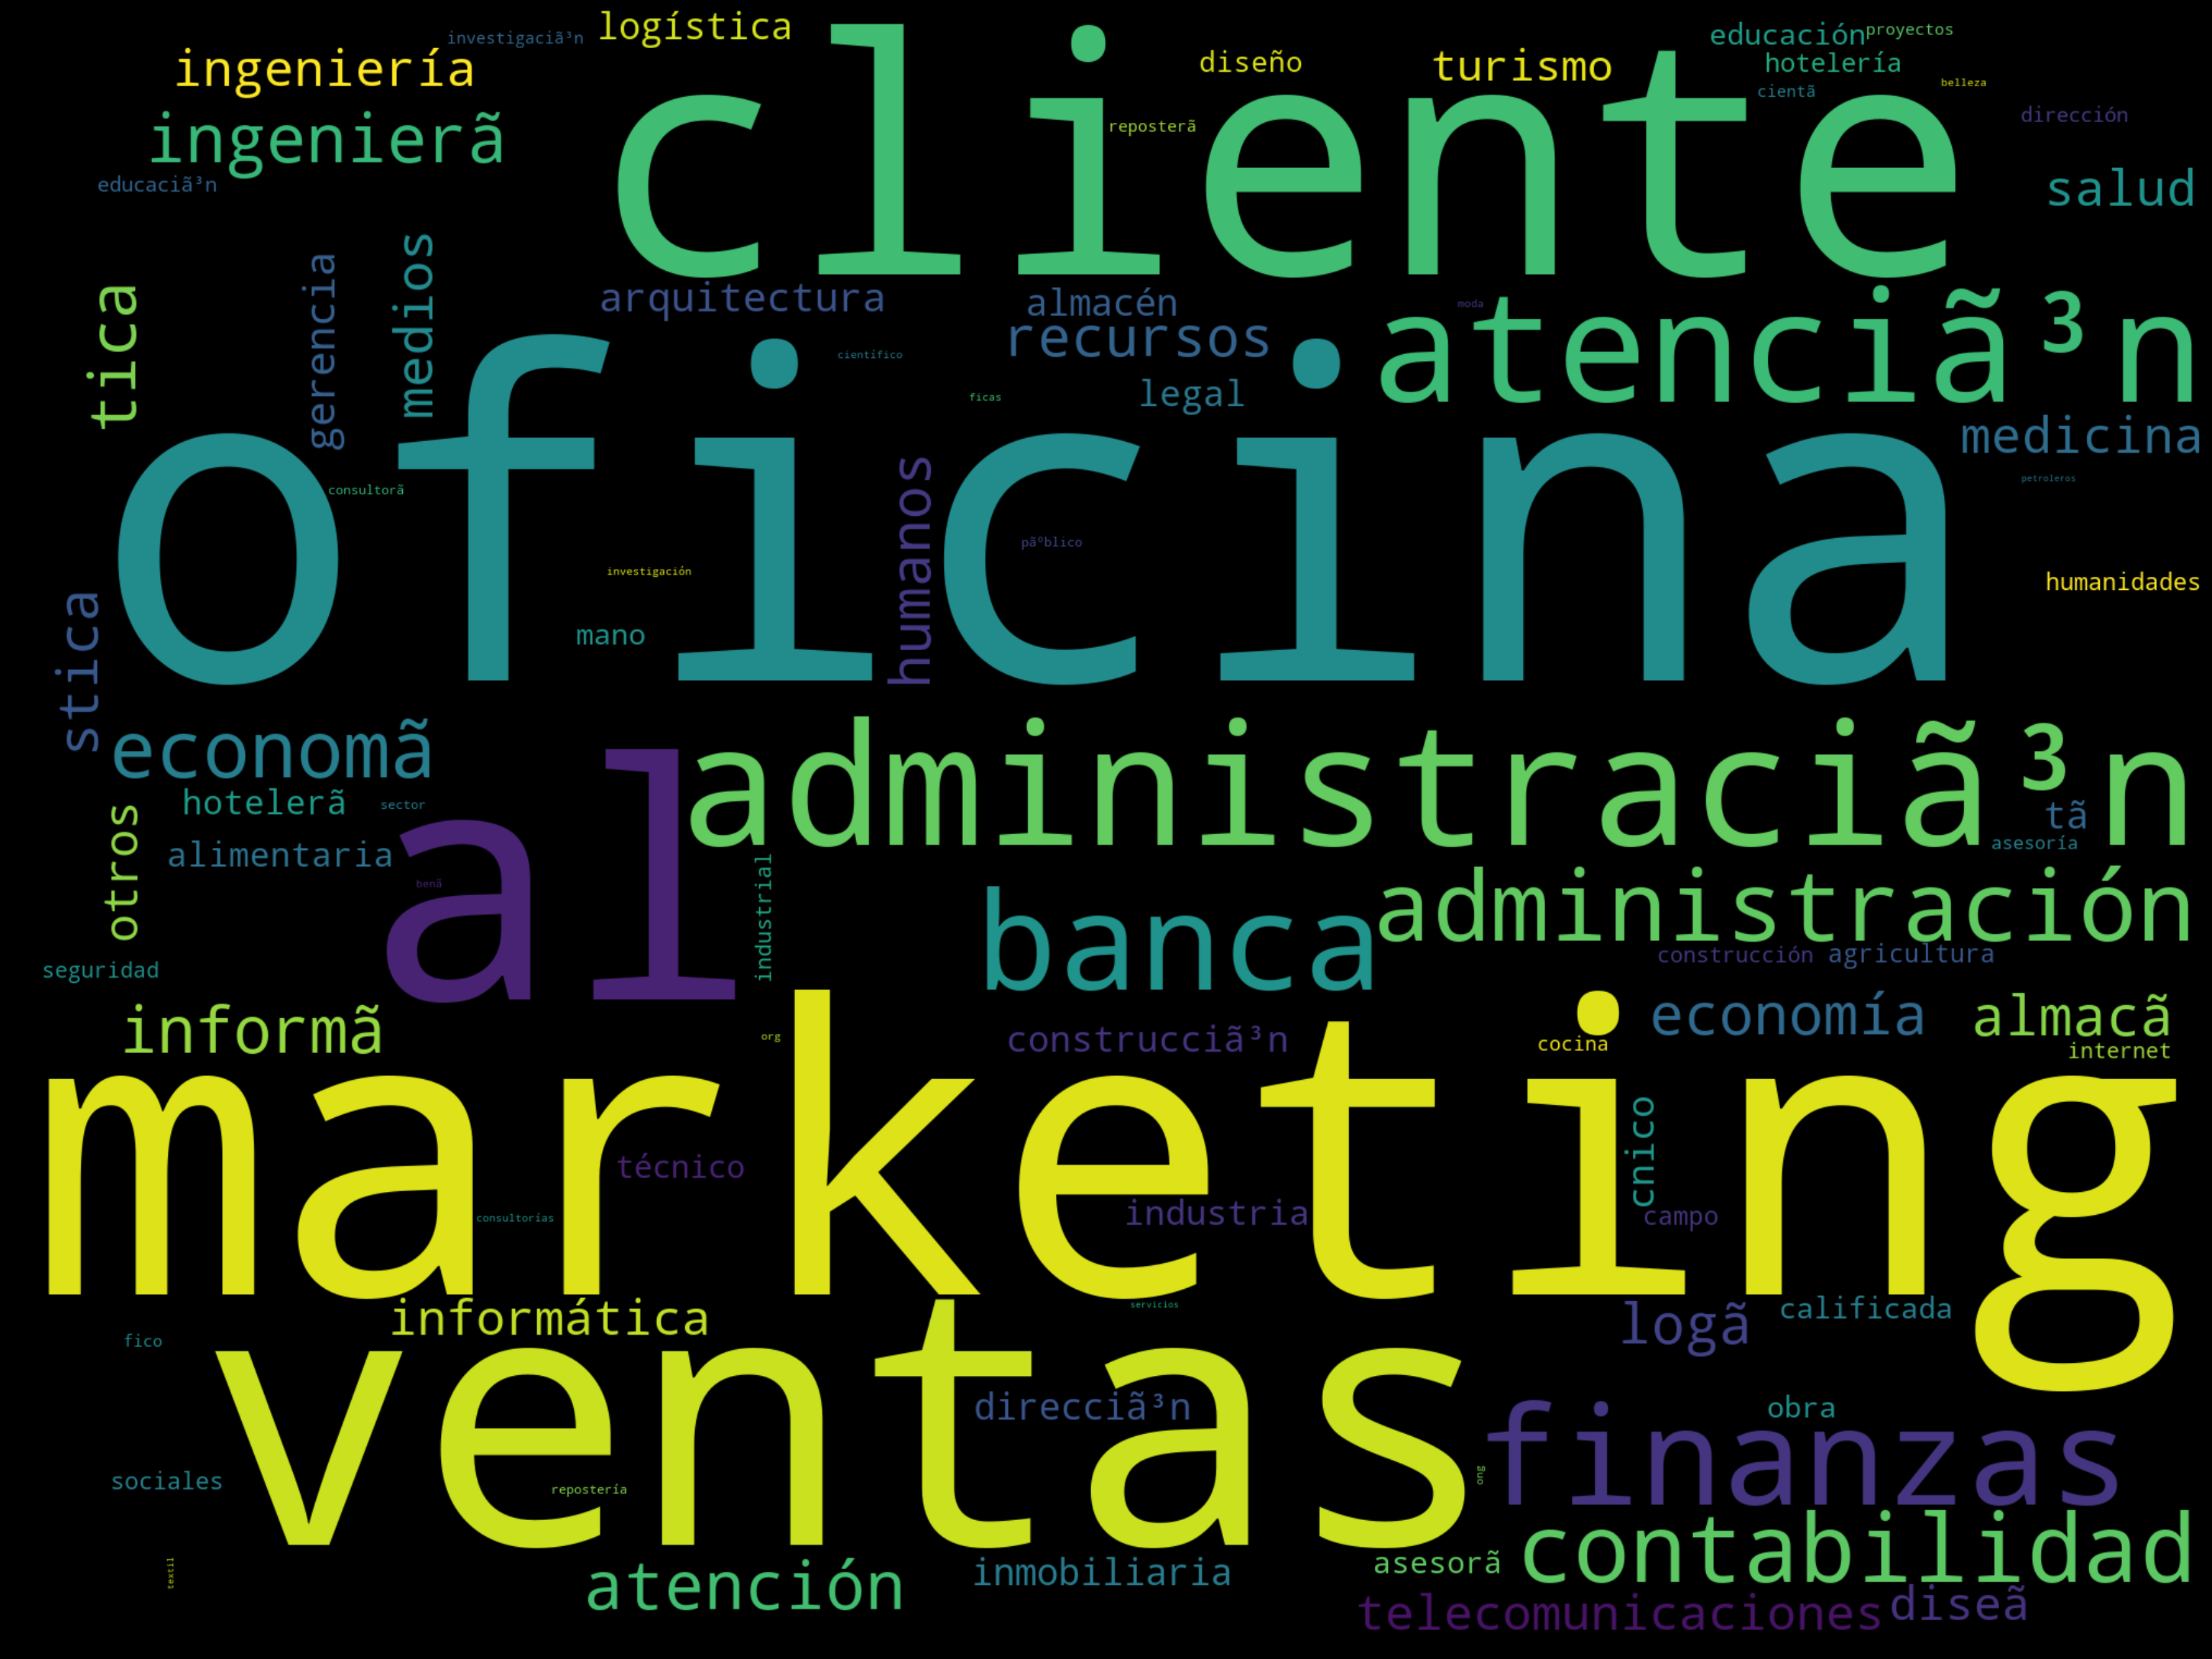

In [15]:
wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(clean_text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
nombres_cargos = column2text(df_new['Nombre_cargo'])

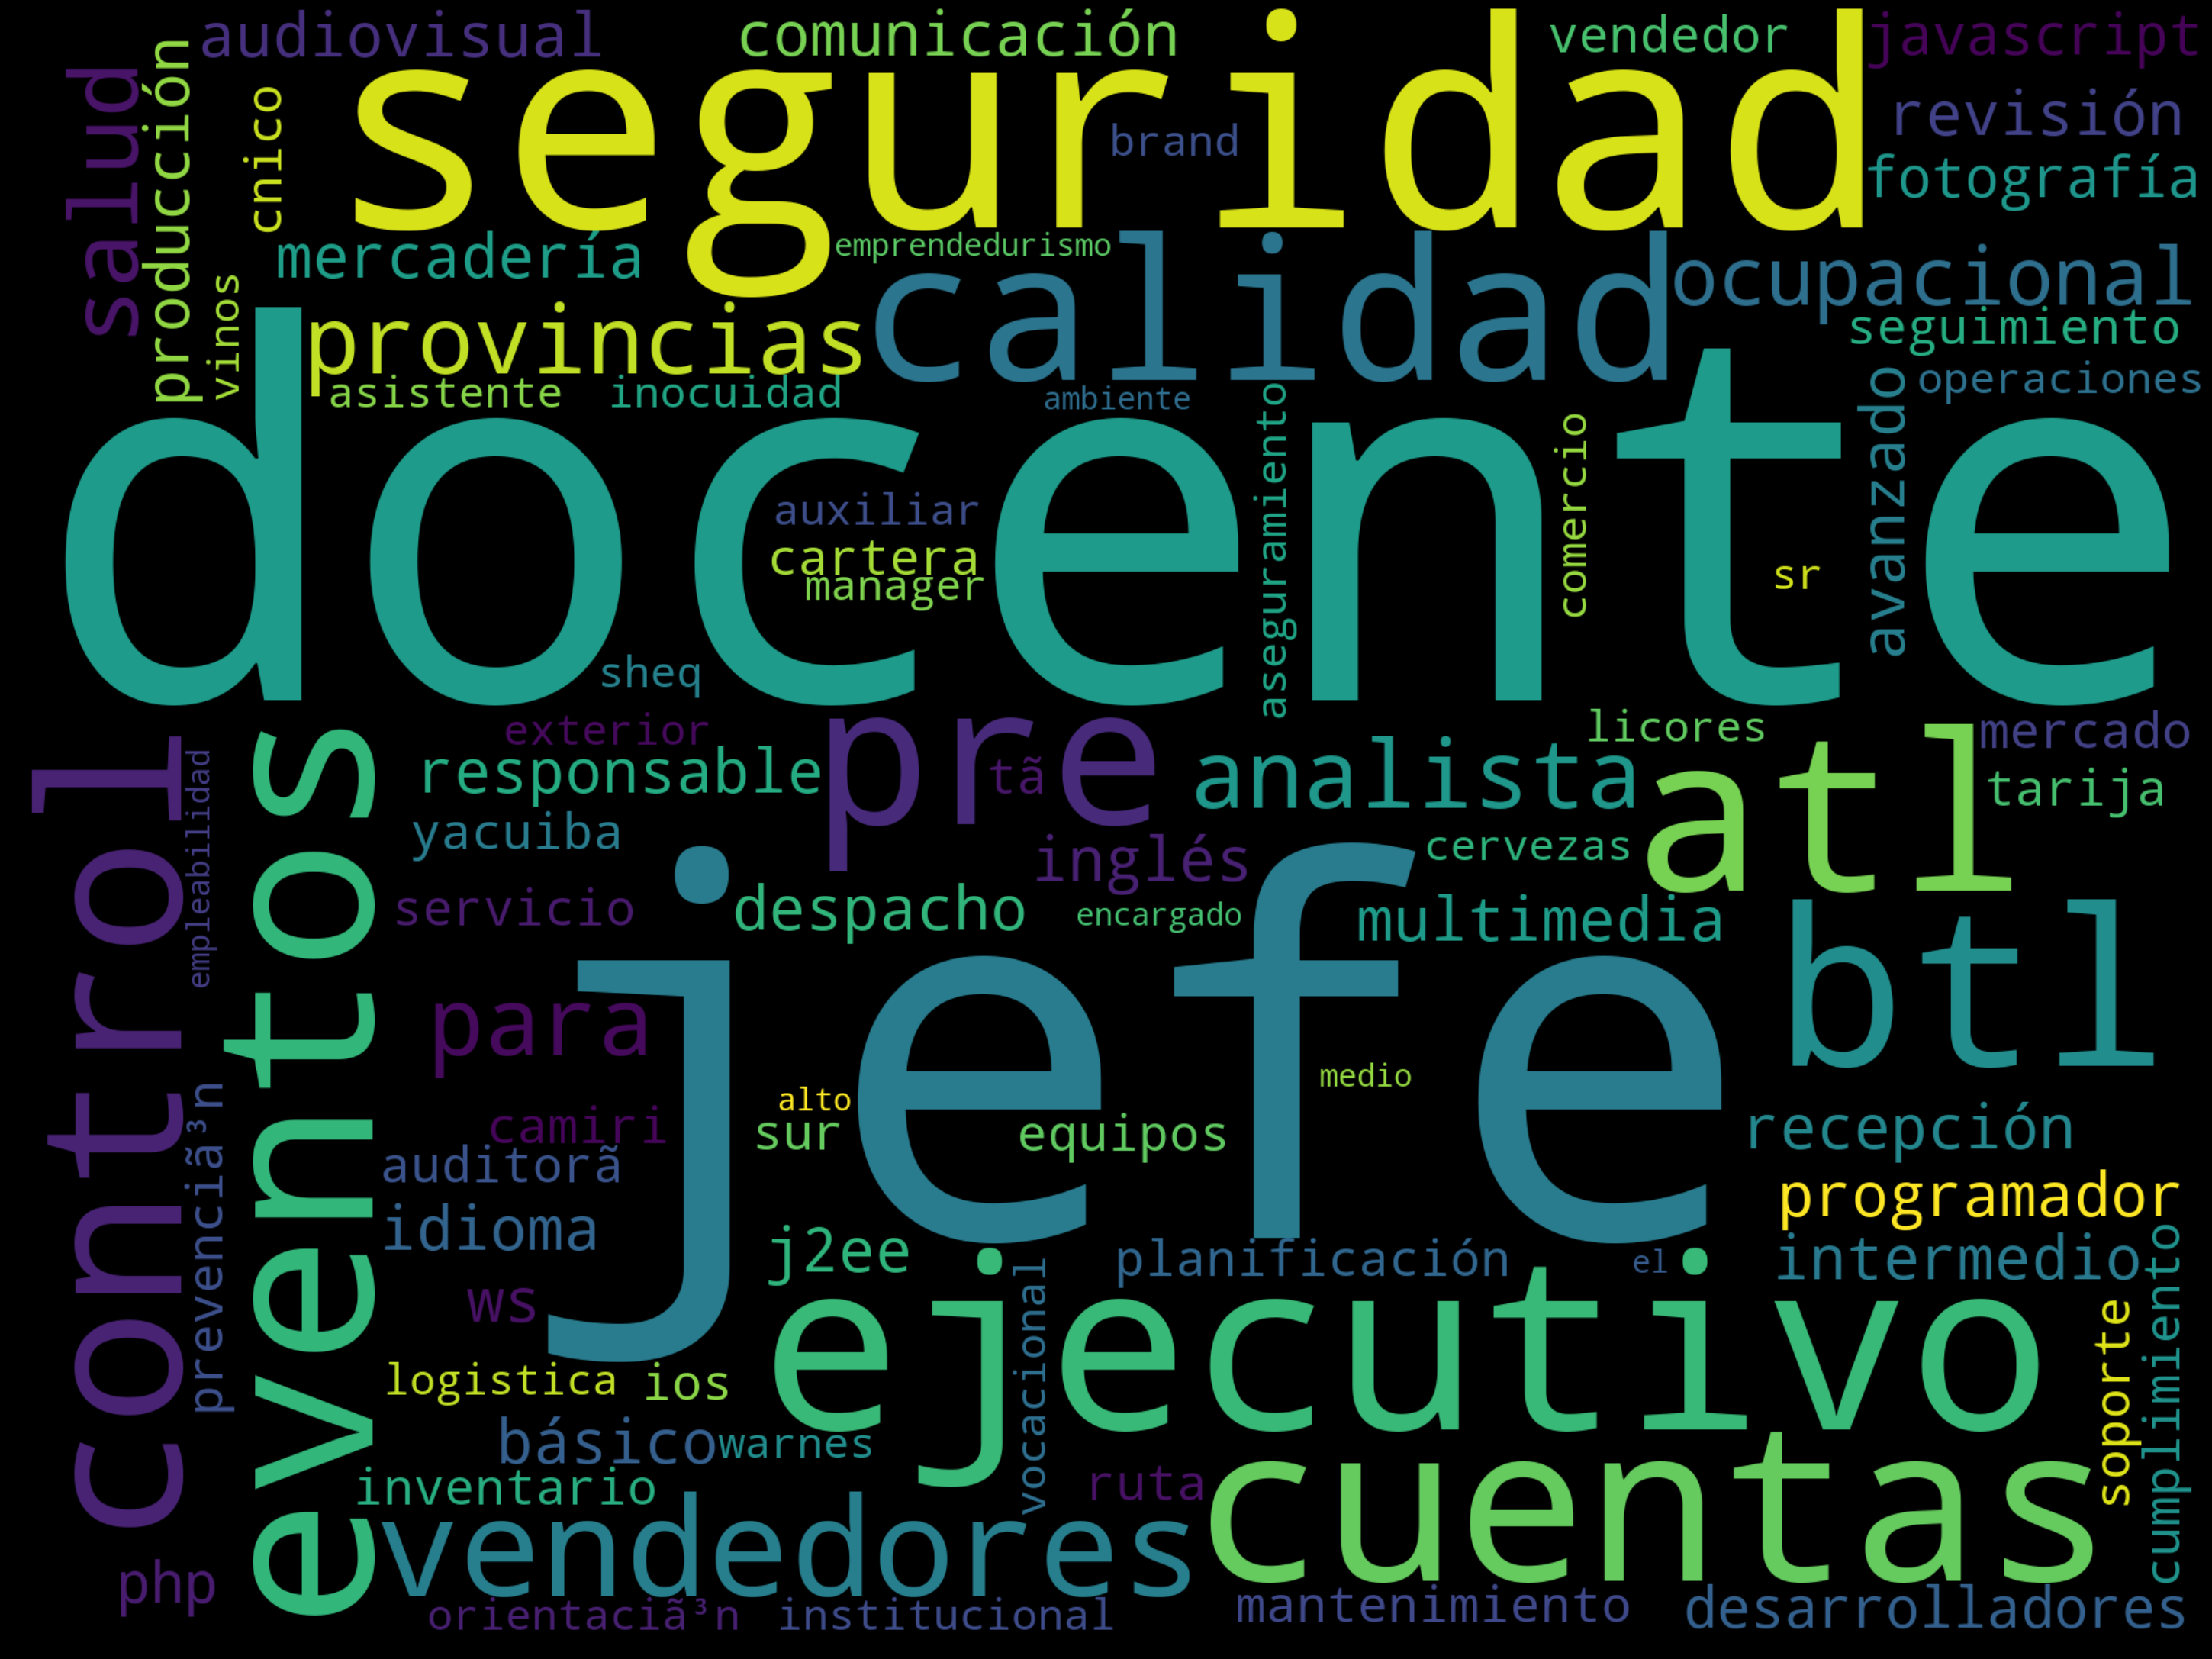

In [18]:
#set the stopwords list
stopwords= set(STOPWORDS)

#append new words to the stopwords list
new_words = {'de', 'al', 'santa', 'cruz', 'cochabamba', 'la', 'paz'}
new_stopwords=stopwords.union(new_words)

wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = new_stopwords).generate(str(nombres_cargos))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ver qué dias publican más publicidad?
en qué mes?
de los informaticos, cuantos son en banca?
eliminar stopwords espanol

If informatica:
    descripcion = 
    wordCloud(descripcion)